In [37]:
import pandas as pd
import numpy as np
# import xlrd as xl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif

%pip install imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

DEPRECATION: Loading egg at /Users/anirudhvasudevan/anaconda3/lib/python3.11/site-packages/fastBPE-0.1.1-py3.11-macosx-11.1-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/anirudhvasudevan/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [9]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
DEPRECATION: Loading egg at /Users/anirudhvasudevan/anaconda3/lib/python3.11/site-packages/fastBPE-0.1.1-py3.11-macosx-11.1-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl (8.4 MB)
DEPRECATION: Loading egg at /Users/anirudhvasudevan/anaconda3/lib/python3.11/site-packages/fastBPE-0.1.1-py3.11-macosx-11.1-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be fo

In [11]:
df = pd.read_excel('ALF_Data.xlsx')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     8785 non-null   int64  
 1   Gender                  8785 non-null   object 
 2   Region                  8785 non-null   object 
 3   Weight                  8591 non-null   float64
 4   Height                  8594 non-null   float64
 5   Body Mass Index         8495 non-null   float64
 6   Obesity                 8495 non-null   float64
 7   Waist                   8471 non-null   float64
 8   Maximum Blood Pressure  8481 non-null   float64
 9   Minimum Blood Pressure  8409 non-null   float64
 10  Good Cholesterol        8768 non-null   float64
 11  Bad Cholesterol         8767 non-null   float64
 12  Total Cholesterol       8769 non-null   float64
 13  Dyslipidemia            8785 non-null   int64  
 14  PVD                     8785 non-null   

In [13]:
df.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
count,8785.000000,8591.000000,8594.000000,8495.000000,8495.000000,8471.000000,8481.000000,8409.000000,8768.000000,8767.000000,...,8222.000000,8785.000000,8705.000000,8785.000000,8783.000000,8785.000000,8763.00000,8779.000000,8750.000000,6000.000000
mean,49.349915,79.100198,167.028124,28.296022,0.315951,96.845178,125.832213,71.516827,51.822536,152.587544,...,0.063610,0.304041,0.402412,0.233238,0.111351,0.311781,0.06653,0.020503,0.029029,0.077333
std,18.831309,19.406975,10.103450,6.184846,0.464921,15.101170,21.046860,12.672351,15.789131,42.976096,...,0.244071,0.460026,0.490412,0.422917,0.314585,0.463247,0.24922,0.141723,0.167896,0.267142
min,20.000000,25.600000,130.400000,12.040000,0.000000,58.500000,72.000000,10.000000,8.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,33.000000,65.400000,159.700000,24.080000,0.000000,86.200000,111.000000,64.000000,41.000000,123.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,47.000000,76.800000,166.600000,27.360000,0.000000,96.300000,122.000000,72.000000,49.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,65.000000,89.550000,174.200000,31.380000,1.000000,106.100000,136.000000,79.000000,60.000000,177.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
max,85.000000,193.300000,200.100000,66.440000,1.000000,173.400000,233.000000,132.000000,160.000000,684.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [14]:
df.isnull().sum()
print("Dimensions Before dropping na values:")
print(df.shape)
df = df.dropna(subset = "ALF")

print("Dimensions After dropping na values:")
print(df.shape)

df["ALF"].value_counts()

Dimensions Before dropping na values:
(8785, 30)
Dimensions After dropping na values:
(6000, 30)


0.0    5536
1.0     464
Name: ALF, dtype: int64

### KNN Imputation

In [15]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
categorical_df = df.select_dtypes(include=['object'])

# print(numerical_df.columns)
# print(categorical_df.columns)

numerical_df = numerical_df.drop(['ALF'], axis=1)
# print(numerical_df.columns)
label_df = df.filter(['ALF'], axis=1)
# label_df = pd.DataFrame(df, columns='ALF')

# numerical_df = numerical_df.drop["ALF"]

# Applying KNN imputation for the numerical data
knn_imputer = KNNImputer(n_neighbors=5)
numerical_df_imputed = pd.DataFrame(knn_imputer.fit_transform(numerical_df), columns=numerical_df.columns)

# Applying the most frequent imputation for the categorical data
freq_imputer = SimpleImputer(strategy='most_frequent')
categorical_df_imputed = pd.DataFrame(freq_imputer.fit_transform(categorical_df), columns=categorical_df.columns)

# Combining the imputed dataframes back into one
df = pd.concat([numerical_df_imputed, categorical_df_imputed], axis=1)

In [16]:
print(df.shape)
df.head(5)

(6000, 29)


,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,Gender,Region,Source of Care
0,65.0,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,M,east,Governament Hospital
1,36.0,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M,south,Never Counsulted
2,66.0,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,M,east,Never Counsulted
3,54.0,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M,east,Private Hospital
4,63.0,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,M,north,clinic


Columns that could be dropped

1. Family Diabetes
2. Family Hyperstension (Diabetes and Huprestension columns exist)
3. Source of Care - questionable
4. Income - has values of 1, 0 and Nan - dont exactly know what it means - questionable

### One hot encoding using dummies method

In [17]:
df = pd.get_dummies(df, columns=['Gender', 'Region','Source of Care'])
print(df.head())

    Age  Weight  Height  Body Mass Index  Obesity  Waist  \
0  65.0    56.0   162.1            21.31      0.0   83.6   
1  36.0    60.2   162.2            22.88      0.0   76.6   
2  66.0    83.9   162.5            31.77      1.0  113.2   
3  54.0    69.4   160.5            26.94      0.0   77.9   
4  63.0    73.1   159.2            28.84      0.0   89.3   

   Maximum Blood Pressure  Minimum Blood Pressure  Good Cholesterol  \
0                   135.0                    71.0              48.0   
1                    96.0                    52.0              31.0   
2                   115.0                    57.0              44.0   
3                   110.0                    57.0              74.0   
4                   132.0                    73.0              67.0   

   Bad Cholesterol  ...  Gender_M  Region_east  Region_north  Region_south  \
0            249.0  ...         1            1             0             0   
1            135.0  ...         1            0          

In [18]:
df = pd.concat([df, label_df], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  6000 non-null   float64
 1   Weight                               6000 non-null   float64
 2   Height                               6000 non-null   float64
 3   Body Mass Index                      6000 non-null   float64
 4   Obesity                              6000 non-null   float64
 5   Waist                                6000 non-null   float64
 6   Maximum Blood Pressure               6000 non-null   float64
 7   Minimum Blood Pressure               6000 non-null   float64
 8   Good Cholesterol                     6000 non-null   float64
 9   Bad Cholesterol                      6000 non-null   float64
 10  Total Cholesterol                    6000 non-null   float64
 11  Dyslipidemia                  

### Logit Model Test

In [20]:
# Adding a constant to the model (intercept)
df['intercept'] = 1.0

model = sm.Logit(df['ALF'], df[['intercept', 'Age']])

# Fitting the model
result = model.fit()
odds_ratios = pd.DataFrame({'Odds Ratio': result.params.apply(lambda x: np.exp(x))})
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.196447
         Iterations 9
           Odds Ratio
intercept    0.000173
Age          1.104937


### Logit Model Example Interpretation

The Age has an odds ratio of approximately 1.104937. This can be interpreted as follows: for each one-year increase in Age, the odds of ALF being 1 are multiplied by roughly 1.10, assuming all other variables in the model are held constant. In other words, each additional year of age is associated with a 10.4937% increase in the odds of having ALF equal to 1.

### im standardization
here its done to make our model perform better

In [21]:
# df_

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# print(numeric_cols)
numeric_cols = numeric_cols.delete(-2)
# print(numeric_cols)
scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### Correlation Matrix of all Variables

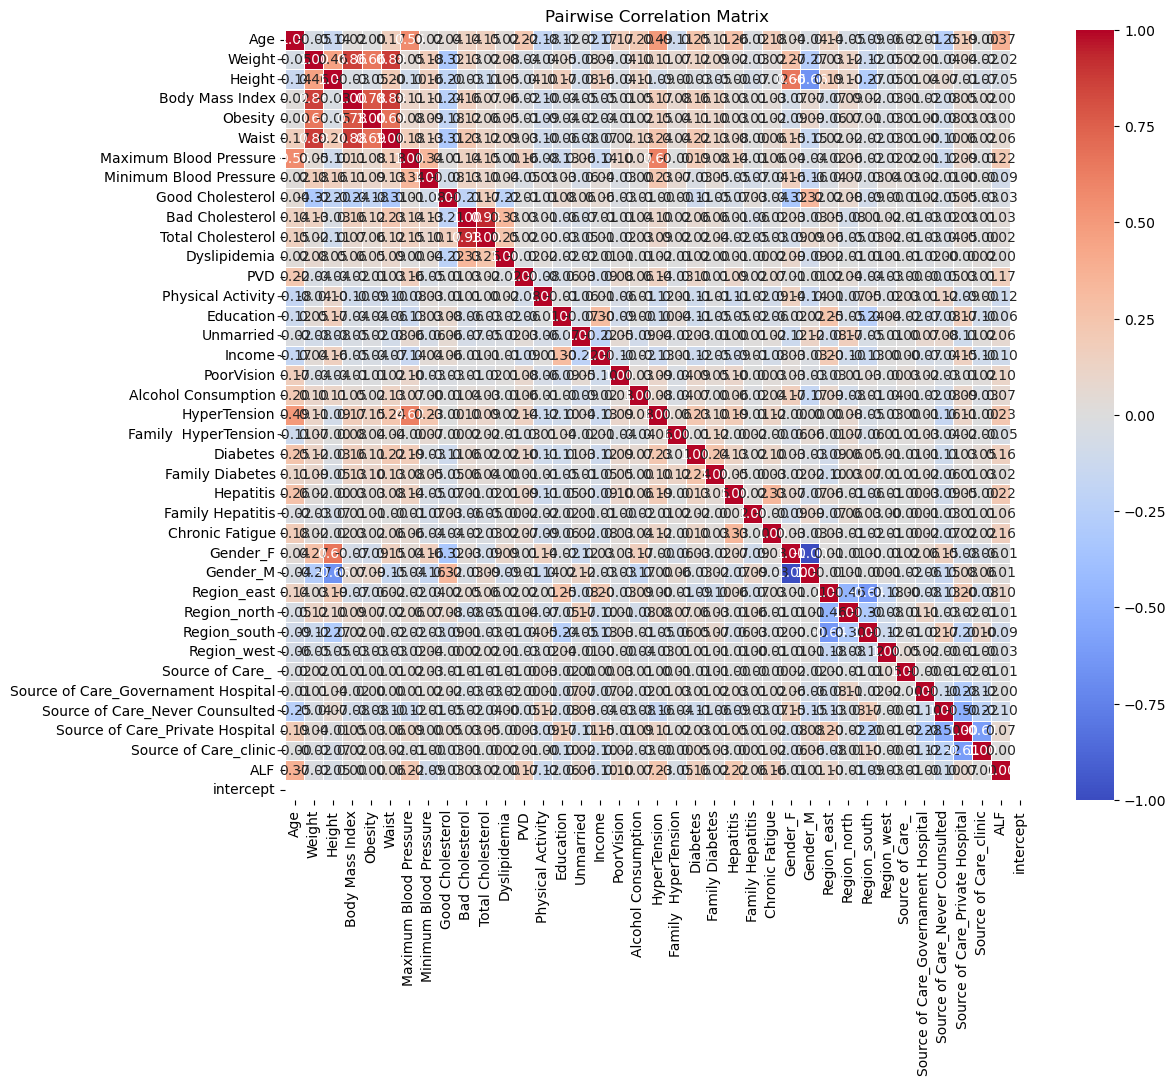

In [22]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pairwise Correlation Matrix')
plt.show()

### Reduced Correlation Matrix of Important Features

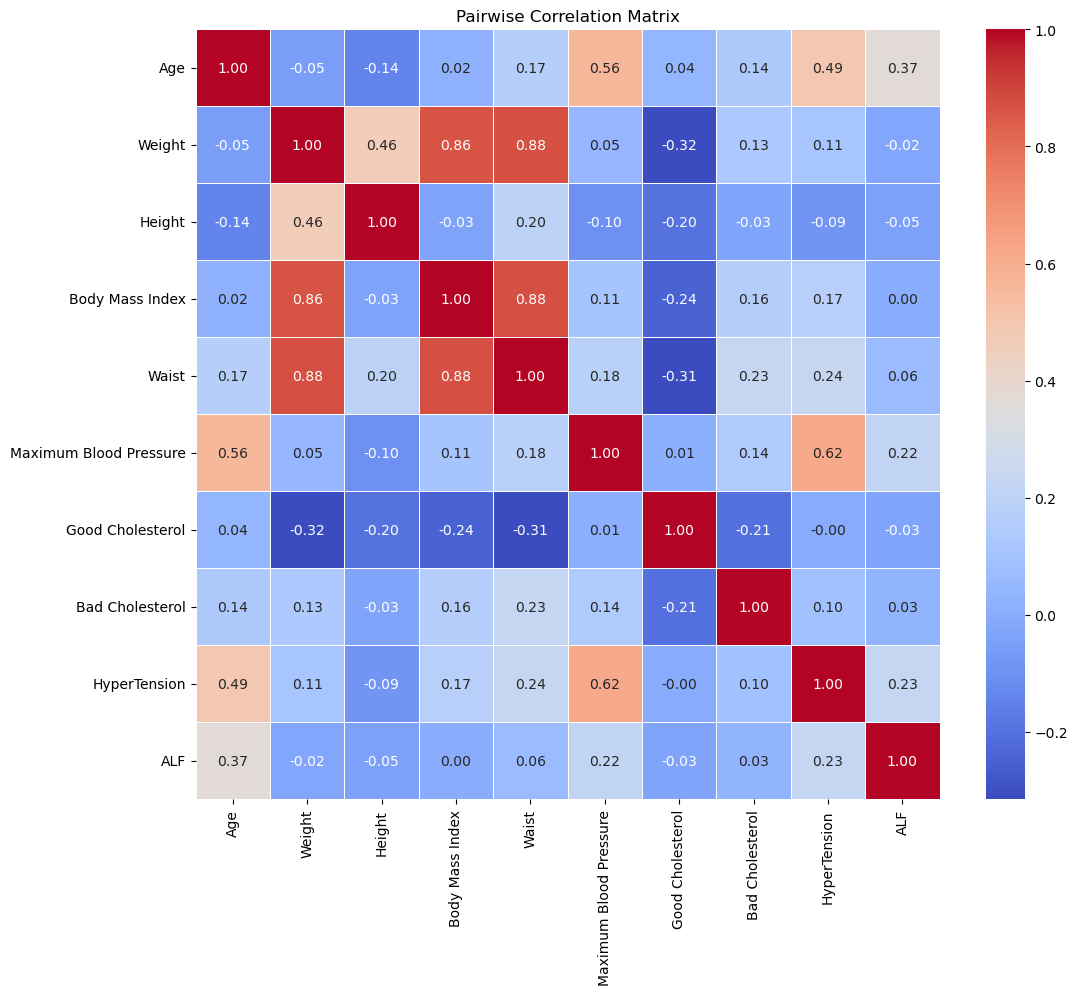

In [23]:
df_corr = df[['Age', 'Weight', 'Height', 'Body Mass Index', 'Waist', 'Maximum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol',
       'HyperTension',  'ALF']]

corr_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pairwise Correlation Matrix')
plt.show()

-Weight and BMI (0.86): This is expected as BMI is calculated from an individual's height and weight. Heavier individuals will have higher BMIs if their height remains constant.

-Weight and Waist (0.88): An increase in weight is often associated with an increase in waist circumference, which is a measure of abdominal fat.

-Age and Maximum Blood Pressure (0.55): As age increases, it is common for blood pressure to rise due to stiffening of the blood vessels and other age-related changes in the cardiovascular system.

-Age and ALF (0.35): ALF might be associated with conditions or risks that increase with age.

-Hypertension and Maximum Blood Pressure (0.62): Hypertension is characterized by high blood pressure, so a positive correlation is expected.

-Good Cholesterol and Waist (-0.32): Higher levels of HDL cholesterol, which are generally beneficial, tend to be associated with lower waist circumference. This could reflect the protective effects of a healthier body composition on cardiovascular health.

### Correlation Matrix of UNIMPORTANT Features

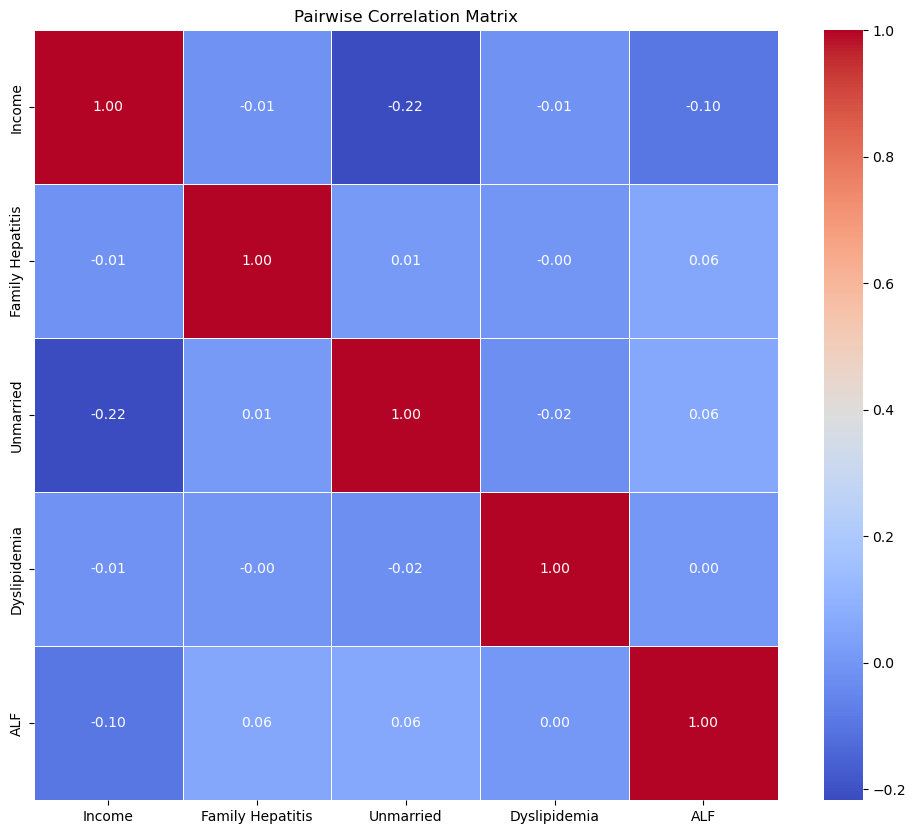

In [24]:
df_Unrelated_columns = df[['Income', 'Family Hepatitis','Unmarried','Dyslipidemia' ,'ALF']]

corr_matrix = df_Unrelated_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pairwise Correlation Matrix')
plt.show()

### ANOVA Selection of Continuous Variables

In [25]:
continuousVar = ['Age','Weight','Height','Body Mass Index','Waist','Maximum Blood Pressure','Minimum Blood Pressure',
                'Good Cholesterol','Bad Cholesterol','Total Cholesterol']
categoricalVar = ['Gender','Region','Obesity','Dyslipidemia','PVD','Physical Activity','Education','Unmarried','Income',
                 'Source of Care','PoorVision','Alcohol Consumption','HyperTension','Family  HyperTension','Diabetes',
                 'Family Diabetes','Hepatitis','Family Hepatitis','Chronic Fatigue']

df2 = pd.read_excel('ALF_Data.xlsx')
df2 = df2.dropna()

df_contVar = df2[continuousVar]
df_catVar = df2[categoricalVar]

/Users/anirudhvasudevan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  force_all_finite=False,


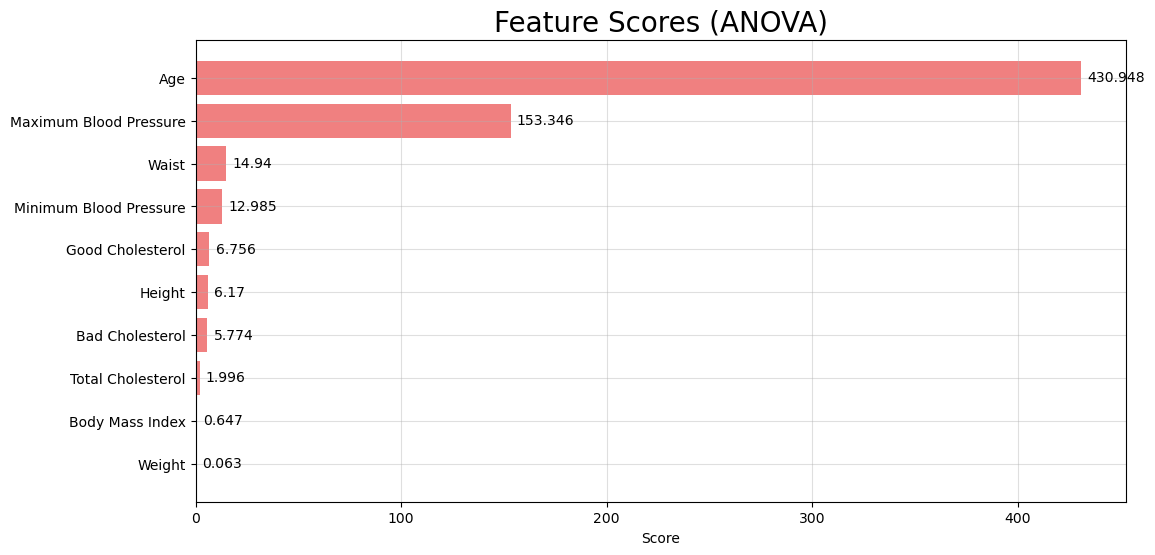

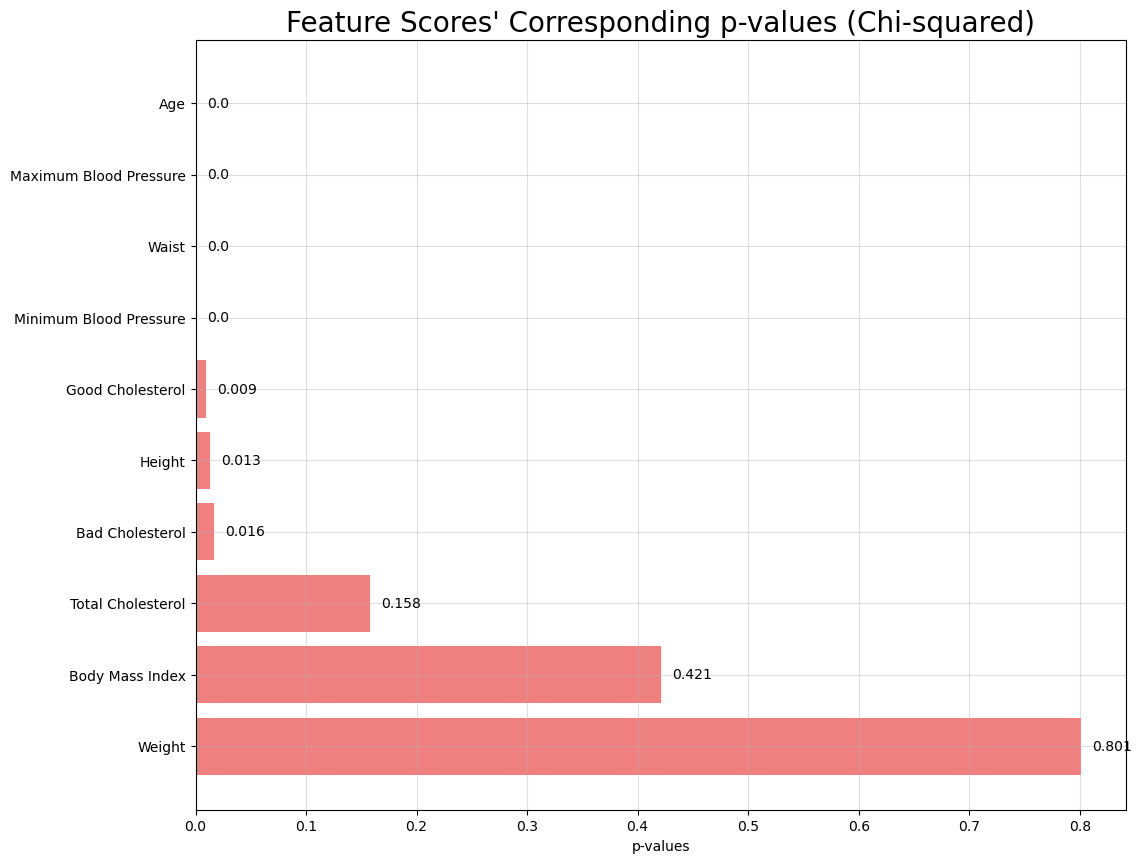

In [26]:
# continuous variables
k = df_contVar.shape[1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_contVar, df2[['ALF']], test_size=0.3, shuffle=True, random_state=42)

selector = SelectKBest(score_func=f_classif, k=k)
selector.fit_transform(X_train2, y_train2)
varScore = selector.scores_
varpval = selector.pvalues_
selected_Var = list(selector.get_feature_names_out())
res = pd.Series(varScore, index=selected_Var).sort_values(ascending=True)
res2 = pd.Series(varpval, index=selected_Var).sort_values(ascending=False)

# visualize feature scores in bar chart
plt.figure(figsize=(12,6))
plt.barh(y=res.index, width=res.values, color='lightcoral')
plt.xlabel('Score')

for index, values in enumerate(res):
    plt.text(values+3, index, str(round(values,3)), va='center')

plt.title('Feature Scores (ANOVA)', fontsize=20)
plt.grid(alpha=0.4)
plt.show()

# visualize feature scores' p-values in bar chart
plt.figure(figsize=(12,10))
plt.barh(y=res2.index, width=res2.values, color='lightcoral')
plt.xlabel('p-values')

for index, values in enumerate(res2):
    plt.text(values+0.01, index, str(round(values,3)), va='center')

plt.title('Feature Scores\' Corresponding p-values (Chi-squared)', fontsize=20)
plt.grid(alpha=0.4)
plt.show()

Continuous Feature Selection via ANOVA (Analysis of Variance) test evaluates whether the means of continuous features differ significantly across different groups or categories of the target variable. Features with higher F-scores (or p-values under 0.05) are considered significant. Here, we can feature scores and their corresponding p-values in two horizontal bar plots.

### ChiSq Selection of Categorical Variables

In [27]:
# split the dataset into training and test data (80:20)
X_train, X_test, y_train, y_test = train_test_split(df_catVar, df2[['ALF']], test_size=0.3, shuffle=True, random_state=42)

# check the dimension of the training and test dataset
print('Dimension of the training data: ', X_train.shape)
print('Dimension of the test data: ', X_test.shape)

# impute the missing value in categorical variables with 'mode'
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_train = imputer.fit_transform(X_train)
cat_train_df = pd.DataFrame(cat_train, columns=X_train.columns)

cat_test = imputer.transform(X_test)
cat_test_df = pd.DataFrame(cat_test, columns=X_test.columns)

cat_train_df = pd.get_dummies(cat_train_df, columns=['Gender', 'Region', 'Source of Care'])
cat_test_df = pd.get_dummies(cat_test_df, columns=['Gender', 'Region', 'Source of Care'])

Dimension of the training data:  (3025, 19)
Dimension of the test data:  (1297, 19)


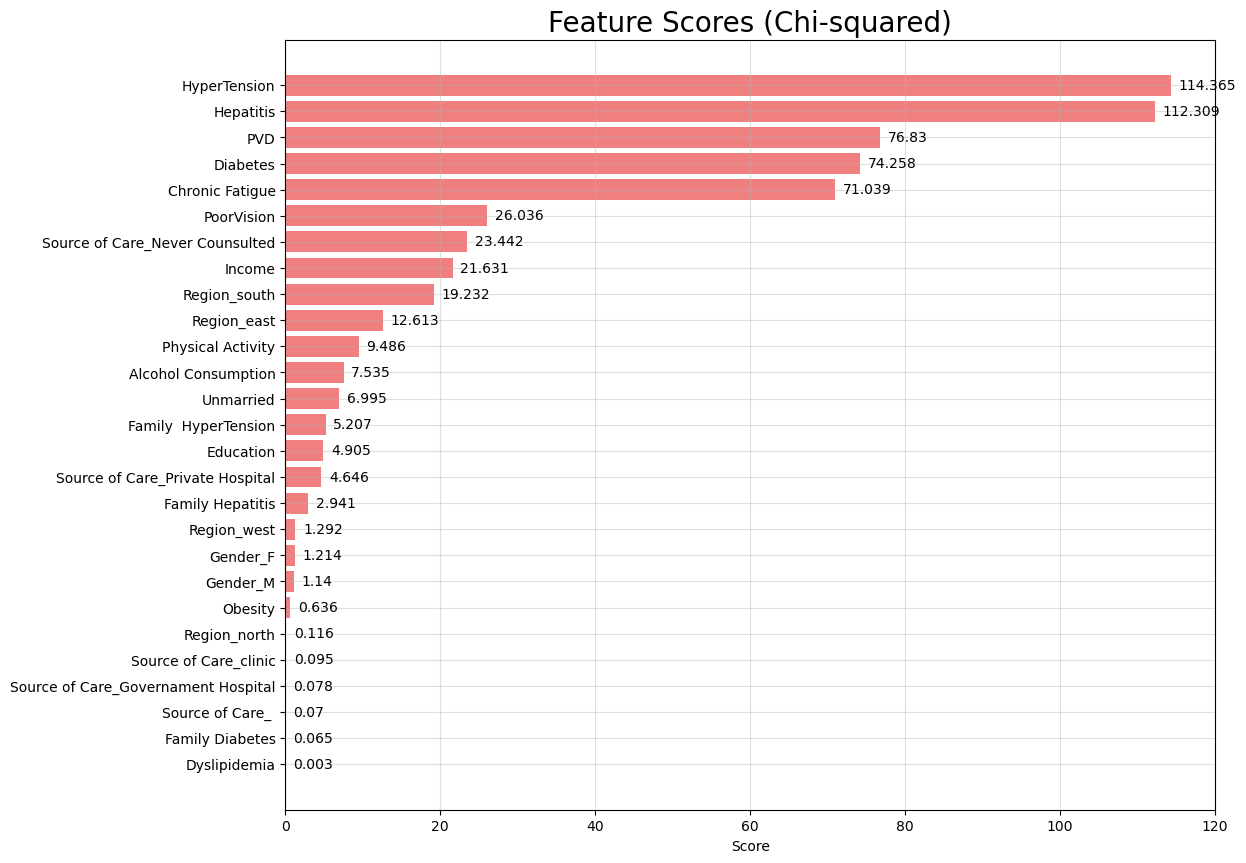

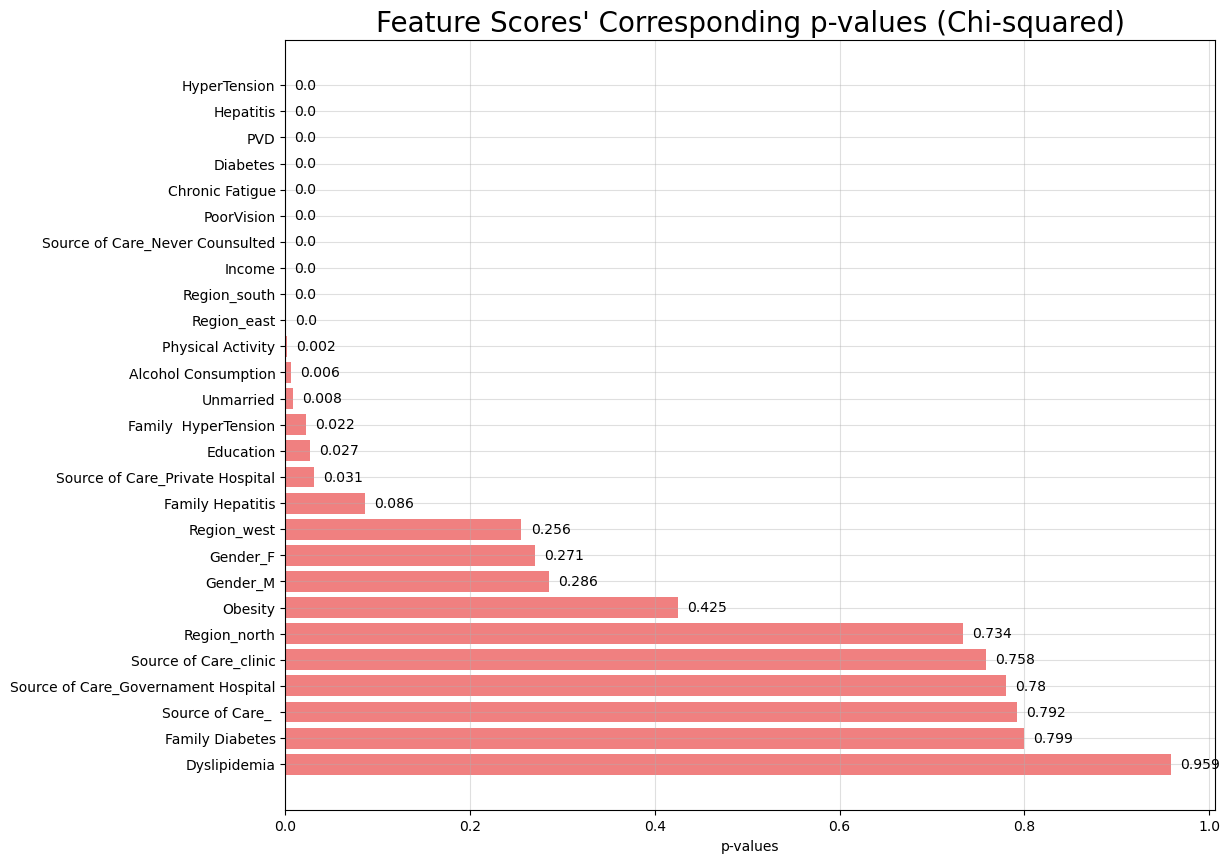

In [28]:
# categorical variables
k = cat_train_df.shape[1]

selector = SelectKBest(score_func=chi2, k=k)
selector.fit_transform(cat_train_df, y_train)
varScore = selector.scores_
varpval = selector.pvalues_
selected_Var = list(selector.get_feature_names_out())

res = pd.Series(varScore, index=selected_Var).sort_values(ascending=True)
res2 = pd.Series(varpval, index=selected_Var).sort_values(ascending=False)

# visualize feature scores in bar chart
plt.figure(figsize=(12,10))
plt.barh(y=res.index, width=res.values, color='lightcoral')
plt.xlabel('Score')

for index, values in enumerate(res):
    plt.text(values+1, index, str(round(values,3)), va='center')

plt.title('Feature Scores (Chi-squared)', fontsize=20)
plt.grid(alpha=0.4)
plt.show()

# visualize feature scores' p-values in bar chart
plt.figure(figsize=(12,10))
plt.barh(y=res2.index, width=res2.values, color='lightcoral')
plt.xlabel('p-values')

for index, values in enumerate(res2):
    plt.text(values+0.01, index, str(round(values,3)), va='center')

plt.title('Feature Scores\' Corresponding p-values (Chi-squared)', fontsize=20)
plt.grid(alpha=0.4)
plt.show()

Categorical Feature Selection via Chi-Square tests how dependent a categorical feature is on the target variable. It checks if their relationship is beyond what is an expected frequency (random or no relationship). If the Chi-Square score is above a set threshold (or p-value below 0.05), the feature is considered significant for prediction or analysis. Here, we can feature scores and their corresponding p-values in two horizontal bar plots.

### Exploratory Analysis of Distribution of Variables

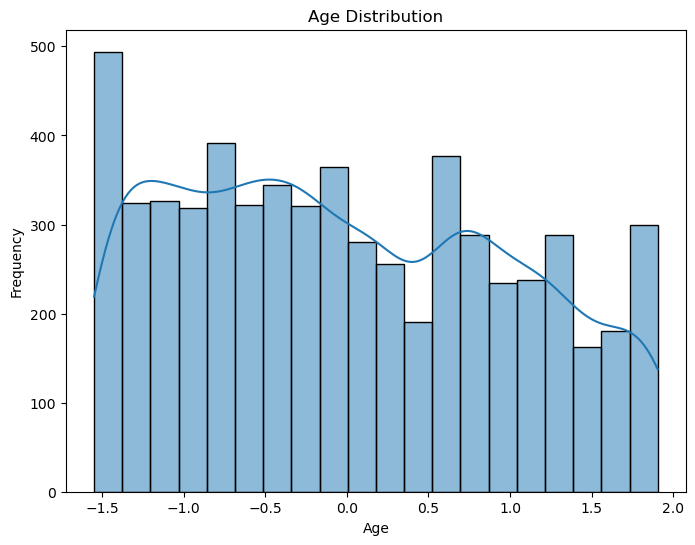

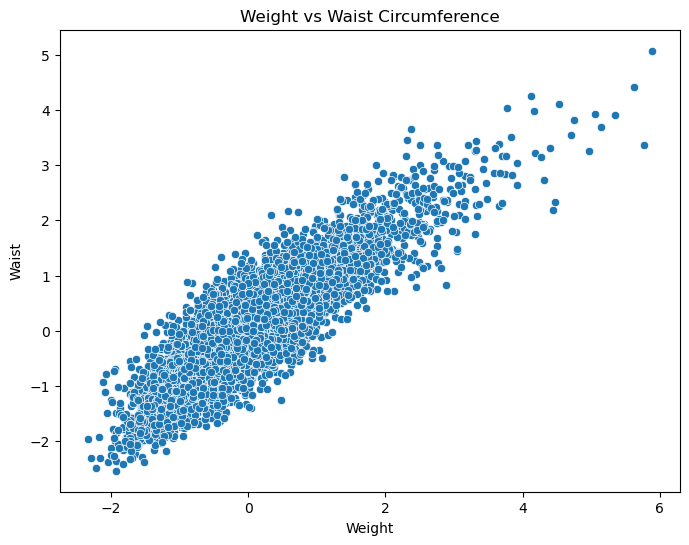

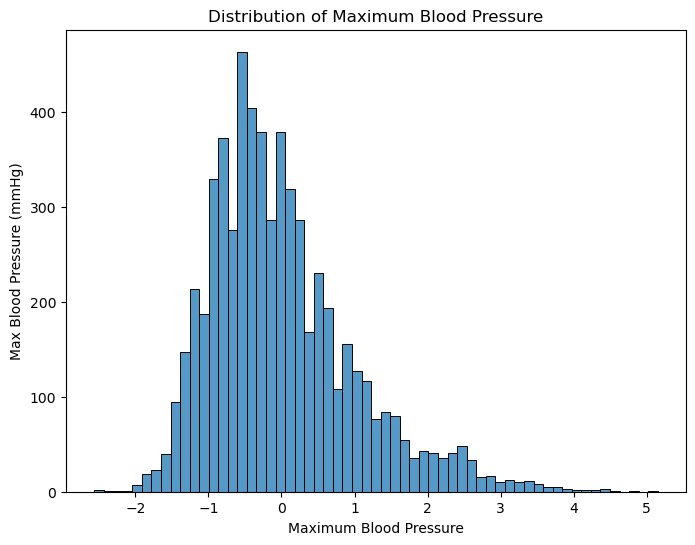

/var/folders/fb/42myvx2n7qj1h3pccz2ljltw0000gn/T/ipykernel_24466/501484445.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Good Cholesterol'], shade=True)


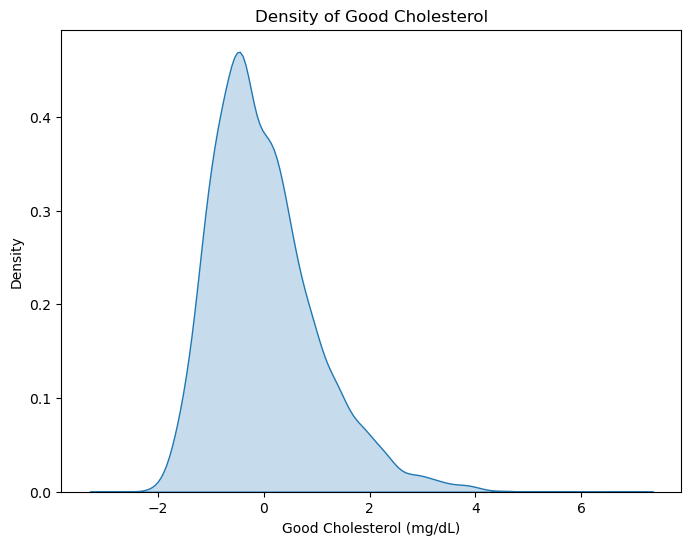

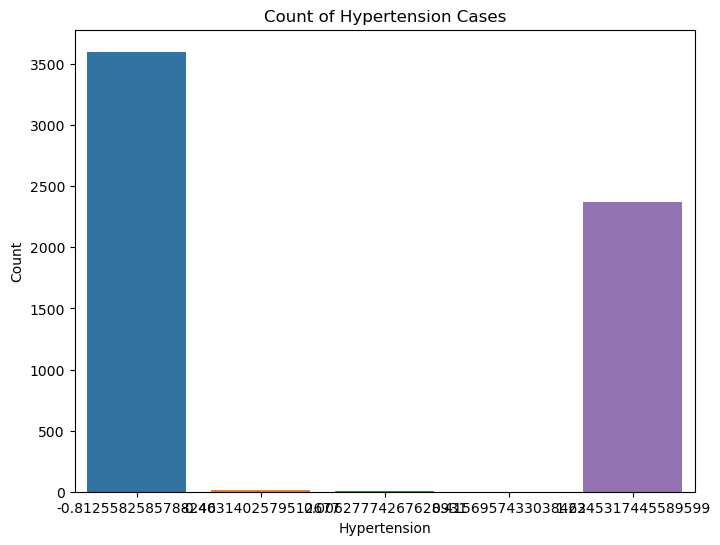

In [29]:
# Histogram for 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot for 'Weight' vs 'Waist'

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='Waist', data=df)
plt.title('Weight vs Waist Circumference')
plt.xlabel('Weight')
plt.ylabel('Waist')
plt.show()

# Box Plot for 'Max_Blood_Pressure'

plt.figure(figsize=(8, 6))
sns.histplot(x=df['Maximum Blood Pressure'])
plt.title('Distribution of Maximum Blood Pressure')
plt.ylabel('Max Blood Pressure (mmHg)')
plt.show()

# Density Plot for 'Good_Cholesterol'
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Good Cholesterol'], shade=True)
plt.title('Density of Good Cholesterol')
plt.xlabel('Good Cholesterol (mg/dL)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=df['HyperTension'])
plt.title('Count of Hypertension Cases')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

### Random Forest Model

Dimension of the training data:  (4200, 38)
Dimension of the test data:  (1800, 38)


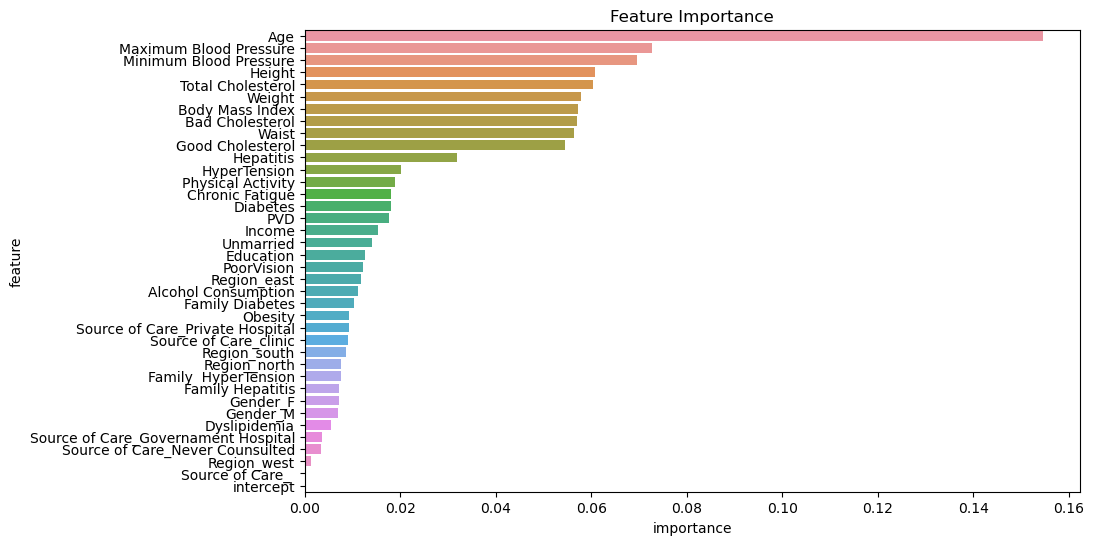

In [30]:
# categorical_vars = ['Gender', 'Region', 'Source of Care']
# df_encoded = pd.get_dummies(df, columns=categorical_vars)

X = df.drop('ALF', axis=1)

y = df['ALF'].astype(int)

# split the dataset into training and test data (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df['ALF'], shuffle=True, random_state=42)

print('Dimension of the training data: ', X_train.shape)
print('Dimension of the test data: ', X_test.shape)

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

The results from this roughly agree with the ANOVA and ChiSq tests. Features with higher importantance in these tests are also of higher importance usually for the random forest model. This makes sense!

In [31]:
param_grid = { 
   'n_estimators': [25, 50, 100, 150, 200, 500], 
   'max_features': ['sqrt', 'log2', None], 
   'max_depth': [3, 6, 9], 
   'max_leaf_nodes': [3, 6, 9], 
   'criterion' :['gini', 'entropy'],
} 

grid_search = GridSearchCV(RandomForestClassifier(), 
                          param_grid=param_grid) 
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=500)


In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

SMOTE ANALYSIS THINGE

In [33]:
# X = df.drop('ALF', axis=1)
X = df[['Age','Height','Body Mass Index','Minimum Blood Pressure', 'Good Cholesterol','Bad Cholesterol']]

y = df['ALF'].astype(int)

# split the dataset into training and test data (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df['ALF'], shuffle=True, random_state=42)

print('Dimension of the training data: ', X_train.shape)
print('Dimension of the test data: ', X_test.shape)

Dimension of the training data:  (4200, 6)
Dimension of the test data:  (1800, 6)


In [36]:
%pip install imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train)
print('before', counter)
smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('after', counter)

DEPRECATION: Loading egg at /Users/anirudhvasudevan/anaconda3/lib/python3.11/site-packages/fastBPE-0.1.1-py3.11-macosx-11.1-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/anirudhvasudevan/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

### Random Forest and SMOTE and selected features

In [ ]:
model_grid = RandomForestClassifier(max_depth=6, 
                                    max_features=None, 
                                    max_leaf_nodes=6, 
                                    n_estimators=50,
                                    criterion = 'gini') 
model_grid.fit(X_train_sm, y_train_sm) 
y_pred_grid_sm = model_grid.predict(X_test)
# print('Results before SMOTE')
# print(classification_report(y_pred_grid_sm, y_test))
# print('\n')

print('Results after SMOTE')
print(classification_report(y_pred_grid_sm, y_test))

Results after SMOTE
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1299
           1       0.86      0.24      0.37       501

    accuracy                           0.78      1800
   macro avg       0.81      0.61      0.62      1800
weighted avg       0.79      0.78      0.73      1800



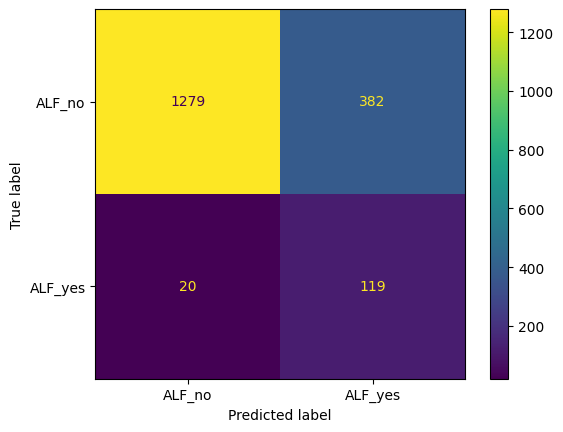

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_grid_sm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['ALF_no', 'ALF_yes'])

cm_display.plot()
plt.show()

model 1 AUC score: 0.8130665846612295


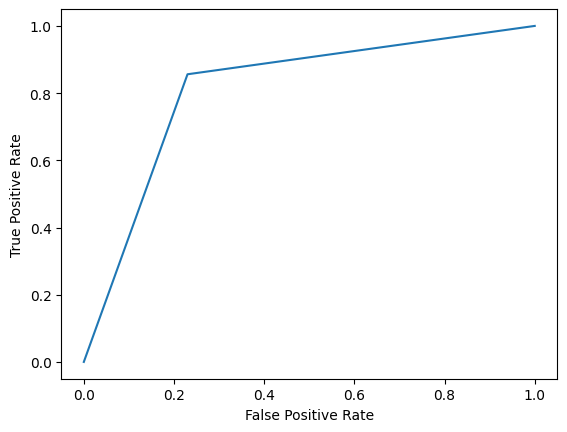

In [ ]:
plot_roc_curve(y_test, y_pred_grid_sm)
print(f'model Random Forest AUC score: {roc_auc_score(y_test, y_pred_grid_sm)}')

### KNearestNeighbors and SMOTE selected features

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

grid_sel = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid_sel.fit(X_train_sm, y_train_sm)

print(grid_sel.best_score_)
print(grid_sel.best_params_)
print(grid_sel.best_estimator_)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
0.9402580645161291
{'n_neighbors': 2, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=2)


In [ ]:
model_grid_knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
model_grid_knn.fit(X_train_sm, y_train_sm)
y_pred_grid_knn = model_grid_knn.predict(X_test)
print(classification_report(y_pred_grid_knn, y_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1577
           1       0.40      0.25      0.31       223

    accuracy                           0.86      1800
   macro avg       0.65      0.60      0.62      1800
weighted avg       0.84      0.86      0.85      1800



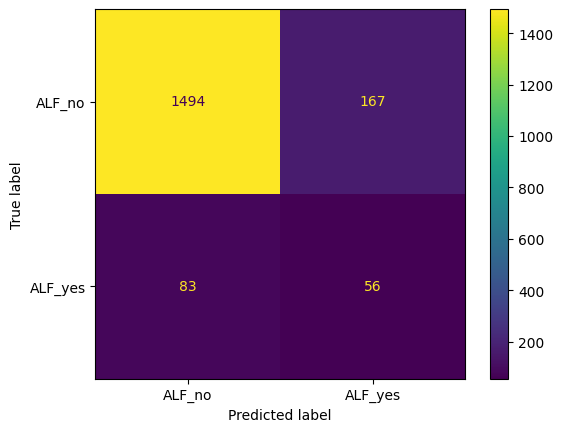

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_grid_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['ALF_no', 'ALF_yes'])

cm_display.plot()
plt.show()

model KNN AUC score: 0.651167927789015


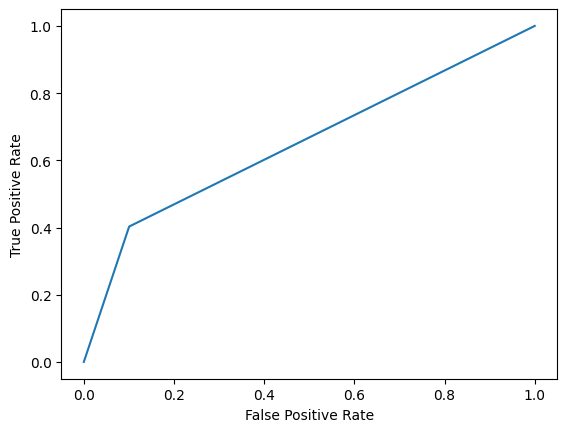

In [ ]:
plot_roc_curve(y_test, y_pred_grid_knn)
print(f'model KNN AUC score: {roc_auc_score(y_test, y_pred_grid_knn)}')

DC and SMOTE and sel feat

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.model_selection import GridSearchCV
# from sklearn.cross_validation import  cross_val_score

# X, Y = createDataSet(filename)

# X_sel = df.drop('ALF', axis=1)
# X_sel = df[['Age','Height','Body Mass Index','Minimum Blood Pressure', 'Good Cholesterol','Bad Cholesterol']]

# y_sel = df['ALF'].astype(int)

# # split the dataset into training and test data (70:30)
# X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y_sel, test_size=0.3, stratify=df['ALF'], shuffle=True, random_state=42)

tree_para_sel = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf_grid_sel = GridSearchCV(DecisionTreeClassifier(), tree_para_sel, cv=5)
clf_grid_sel.fit(X_train_sm, y_train_sm)
print(clf_grid_sel.best_score_)
print(clf_grid_sel.best_params_)
print(clf_grid_sel.best_estimator_)

0.9065806451612903
{'criterion': 'entropy', 'max_depth': 120}
DecisionTreeClassifier(criterion='entropy', max_depth=120)


In [ ]:
model_grid_dc_sel = DecisionTreeClassifier(criterion="entropy", max_depth=70)
model_grid_dc_sel.fit(X_train_sm, y_train_sm)
y_pred_grid_dc_sel = model_grid_dc_sel.predict(X_test)
print(classification_report(y_pred_grid_dc_sel, y_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1585
           1       0.35      0.23      0.28       215

    accuracy                           0.86      1800
   macro avg       0.63      0.59      0.60      1800
weighted avg       0.83      0.86      0.84      1800



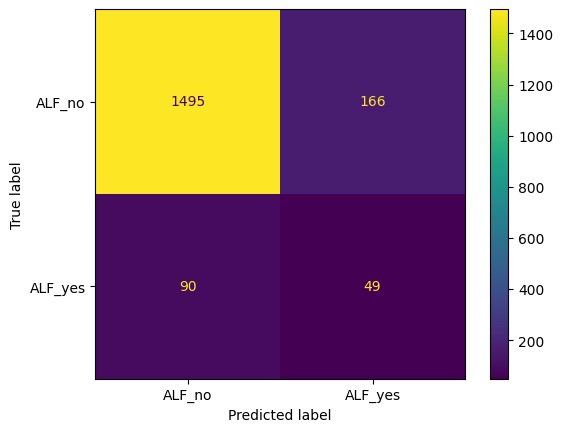

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_grid_dc_sel)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['ALF_no', 'ALF_yes'])

cm_display.plot()
plt.show()

model Decision Tree AUC score: 0.6262890951537385


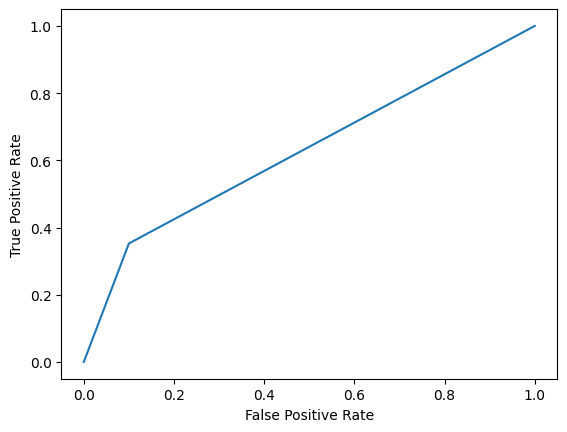

In [ ]:
plot_roc_curve(y_test, y_pred_grid_dc_sel)
print(f'model Decision Tree AUC score: {roc_auc_score(y_test, y_pred_grid_dc_sel)}')

### Logistic Regression and SMOTE and selected features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_sm, y_train_sm)

y_pred = logreg.predict(X_test)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      1661
           1       0.23      0.86      0.37       139

    accuracy                           0.77      1800
   macro avg       0.61      0.81      0.61      1800
weighted avg       0.93      0.77      0.82      1800



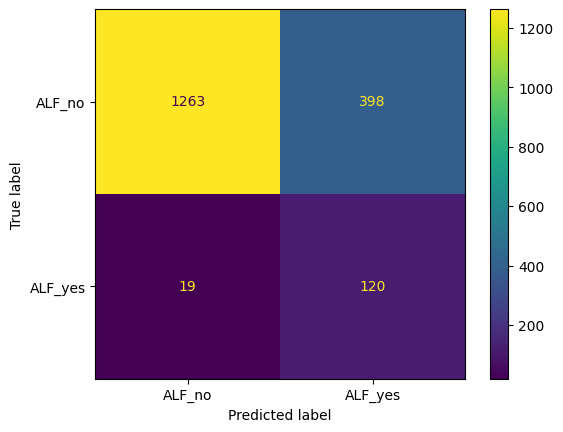

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['ALF_no', 'ALF_yes'])

cm_display.plot()
plt.show()

model Logistic Regression AUC score: 0.8118473312860849


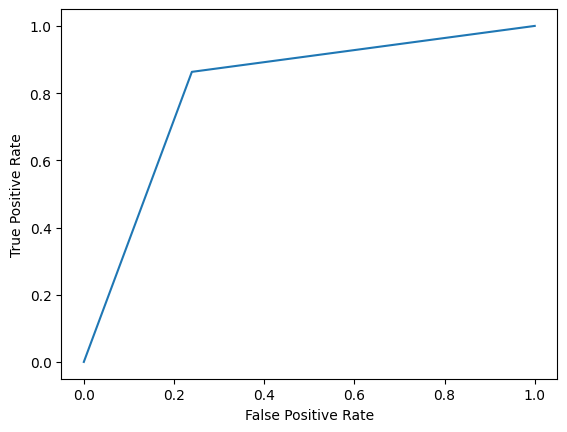

In [ ]:
plot_roc_curve(y_test, y_pred)
print(f'model Logistic Regression AUC score: {roc_auc_score(y_test, y_pred)}')